<a href="https://colab.research.google.com/github/Varunkadam/basic/blob/basic/MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader

In [3]:
import bing_image_downloader

In [5]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [6]:
from bing_image_downloader import downloader
downloader.download('cars', limit=10,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://pictures.topspeed.com/IMG/jpg/201807/5-modern-sports-cars.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://improb.com/wp-content/uploads/2019/07/Best-Street-Legal-Cars-that-Can-Do-Over-200-MPH.jpg
[Error]Invalid image, not saving https://improb.com/wp-content/uploads/2019/07/Best-Street-Legal-Cars-that-Can-Do-Over-200-MPH.jpg

[!] Issue getting: https://improb.com/wp-content/uploads/2019/07/Best-Street-Legal-Cars-that-Can-Do-Over-200-MPH.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #2 from https://pictures.topspeed.com/IMG/jpg/201807/5-modern-supercars-y-2.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://98ron.superunleaded.com/wp-content/uploads/2015/04/Cool-Cars-of-Monaco-0001.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.motortrend.com/uploads/sites/5/2019/12/MotorTrend-Most-Important-Cars-of-the-Decade.jpg
[!]

In [7]:
from bing_image_downloader import downloader
downloader.download('bikes', limit=10,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://www.bikesdirect.com/products/mercier/images/elle_adv_blue_2100.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.bikesdirect.com/products/gravity/mountain_bikes/29-point1-mattred-21.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://p.vitalbmx.com/photos/products/9716/photos/17811/s1600_nagas_org.jpg?1449257146
[%] File Downloaded !

[%] Downloading Image #4 from http://www.bikesdirect.com/products/motobecane/images/300htw_turqs_2100.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.bikesdirect.com/products/dawes/images/lt-sport-grn-xiv-2100.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.bikesdirect.com/products/gravity/275-650b-mountain-bikes/fsx-275-x5-yel-21.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.bikesdirect.com/products/gravity/fat-bikes/bullseye-monster-seafoam-21.jpg
[%] File Downloaded

In [9]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import os

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['cars','bikes']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

target = np.array(target)
images = np.array(images)
flat_data = np.array(flat_data)



In [10]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.186523,0.141176,0.058824,0.192157,0.145098,0.054902,0.192157,0.145098,0.054902,0.192157,0.145098,0.054902,0.196078,0.149020,0.054902,0.203425,0.156366,0.054902,0.207843,0.160784,0.062745,0.215686,0.168627,0.074510,0.225242,0.178183,0.084065,0.235294,0.188235,0.094118,0.254654,0.203922,0.111765,0.274013,0.211765,0.121569,0.282353,0.219608,0.129412,0.294118,...,0.384562,0.417647,0.454902,0.421320,0.452693,0.491908,0.396078,0.415686,0.462745,0.415686,0.435294,0.480144,0.388484,0.417647,0.459072,0.364706,0.400248,0.441176,0.376471,0.409804,0.452693,0.407843,0.442889,0.478431,0.384810,0.424026,0.455895,0.387739,0.426954,0.462248,0.368627,0.402209,0.439216,0.341673,0.373046,0.412261,0.349020,0.376967,0.415686,0
1,0.523830,0.610105,0.630510,0.503490,0.594484,0.627817,0.496876,0.588235,0.618810,0.485908,0.575739,0.610235,0.523961,0.597307,0.618876,0.598209,0.641843,0.641111,0.741647,0.748026,0.706484,0.863412,0.821869,0.757961,0.903556,0.830209,0.767464,0.866000,0.802092,0.744000,0.870353,0.809935,0.736157,0.914222,0.843203,0.756131,0.899464,0.825621,0.745529,0.829373,...,0.742340,0.667830,0.609007,0.748654,0.674144,0.615320,0.751346,0.676837,0.616850,0.764340,0.689830,0.623163,0.773346,0.698837,0.635294,0.772549,0.698039,0.639216,0.769425,0.694915,0.636092,0.760784,0.686275,0.621935,0.780026,0.705516,0.638850,0.774876,0.700366,0.640379,0.741176,0.666667,0.607843,0.760784,0.686275,0.627451,0.758026,0.683516,0.624693,0
2,0.000000,0.000000,0.031373,0.000000,0.000000,0.040196,0.000000,0.000000,0.049020,0.000000,0.000000,0.058824,0.000000,0.000000,0.067647,0.000000,0.000000,0.074510,0.000000,0.000000,0.082026,0.000000,0.000000,0.088235,0.000000,0.000000,0.094118,0.000000,0.000000,0.101961,0.000000,0.000000,0.106863,0.000000,0.000000,0.113725,0.000000,0.000000,0.117647,0.000000,...,0.764706,0.772222,0.778431,0.760784,0.768627,0.776471,0.758824,0.764706,0.774510,0.758824,0.764706,0.776471,0.760458,0.764706,0.776471,0.760784,0.764706,0.777451,0.760784,0.764706,0.776471,0.756863,0.764706,0.776471,0.752941,0.760784,0.776471,0.752941,0.760784,0.774837,0.752941,0.760784,0.772549,0.744118,0.752941,0.765686,0.723529,0.734967,0.750654,0
3,0.996078,0.964758,0.887216,0.992157,0.953098,0.854066,0.992157,0.941176,0.821908,0.992157,0.933333,0.795137,0.992157,0.920706,0.763714,0.992157,0.902534,0.725725,0.992157,0.890196,0.690769,0.992157,0.874510,0.662745,0.992157,0.880497,0.678641,0.992157,0.899425,0.736105,0.992157,0.921569,0.792971,0.992157,0.937255,0.827473,0.992157,0.949020,0.854248,0.992157,...,0.106536,0.149673,0.114379,0.137229,0.184284,0.137255,0.167922,0.226039,0.156157,0.212915,0.283892,0.193307,0.284317,0.370876,0.258899,0.290173,0.375271,0.268000,0.113828,0.168730,0.118847,0.169098,0.247191,0.188105,0.146745,0.229828,0.166092,0.089831,0.154247,0.115031,0.085673,0.152941,0.117647,0.082197,0.143633,0.113725,0.073621,0.132732,0.109804,0
4,0.417166,0.518510,0.636379,0.555641,0.638216,0.728856,0.417425,0.526575,0.644444,0.212850,0.501122,0.638771,0.131261,0.350758,0.440954,0.200654,0.220915,0.267937,0.132680,0.144444,0.183438,0.086275,0.100000,0.127451,0.120915,0.132680,0.167974,0.228486,0.225218,0.268355,0.277209,0.234183,0.251941,0.706314,0.349451,0.272327,0.920730,0.430497,0.304784,0.799667,...,0.587828,0.564484,0.572327,0.588235,0.568627,0.572771,0.570922,0.553163,0.564706,0.561401,0.548834,0.564706,0.577963,0.565359,0.569503,0.599778,0.584092,0.590085,0.604575,0.592810,0.601492,0.584314,0.568590,0.572549,0.584425,0.570699,0.576582,0.584573,0.569725,0.573610,0.568850,0.549242,0.549242,0.586497,0.568739,0.568739,0.634641,0.607004,0.599383,0
5,0.857621,0.861835,0.717399,0.914039,0.894431,0.

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

actual = [1,0,0,1,0,0,1,0,0,1]

predicted = [1,0,0,1,0,0,0,1,0,0]

matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[2 2]
 [1 5]]
Outcome values : 
 2 2 1 5
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           0       0.71      0.83      0.77         6

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10



In [16]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

dataset = datasets.load_diabetes()

alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(dataset.data, dataset.target)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.4823231384163485
0.0001


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Dataset consists of 400 faces
Extracting the top 6 Eigenfaces - PCA using randomized SVD...
done in 0.084s
Extracting the top 6 Non-negative components - NMF...
done in 0.465s
Extracting the top 6 Independent components - FastICA...
done in 0.231s
Extracting the top 6 Sparse comp. - MiniBatchSparsePCA...
done in 0.903s
Extracting the top 6 MiniBatchDictionaryLearning...
done in 0.825s
Extracting the top 6 Cluster centers - MiniBatchKMeans...
done in 0.241s
Extracting the top 6 Factor Analysis components - FA...
done in 0.470s


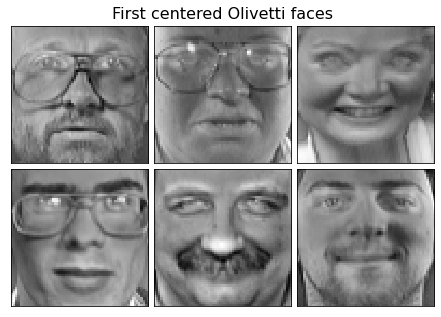

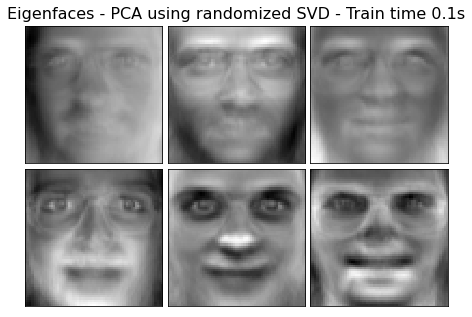

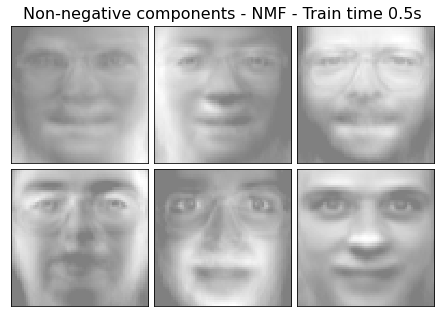

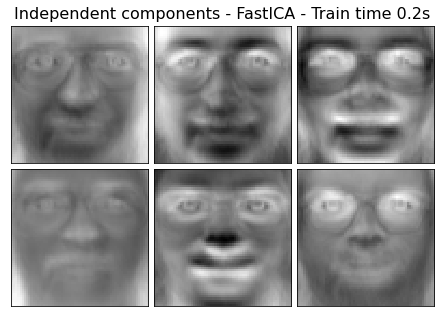

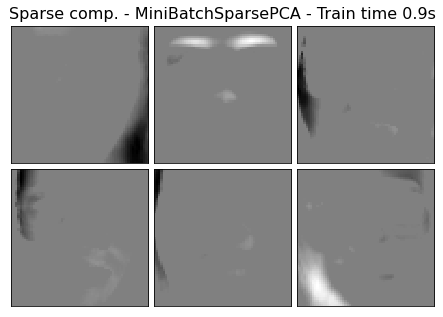

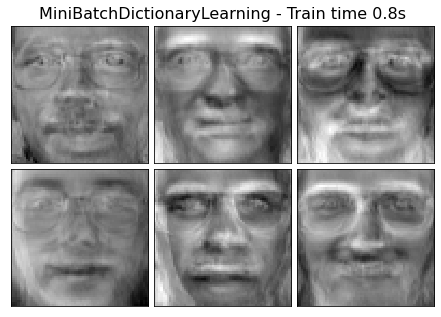

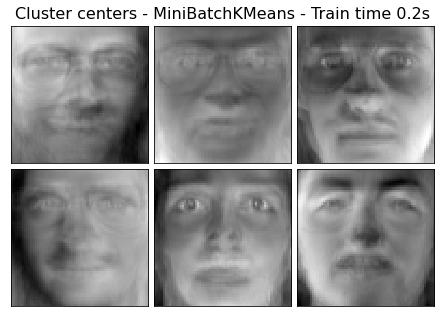

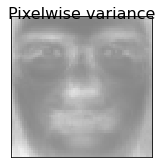

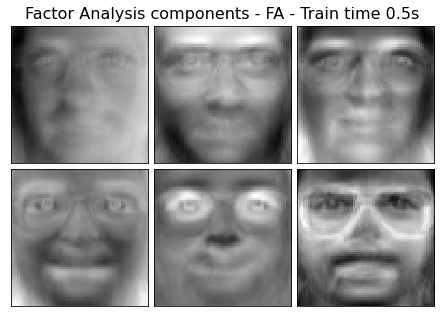

Extracting the top 6 Dictionary learning...
done in 0.826s
Extracting the top 6 Dictionary learning - positive dictionary...
done in 0.835s
Extracting the top 6 Dictionary learning - positive code...
done in 0.257s
Extracting the top 6 Dictionary learning - positive dictionary & code...
done in 0.361s


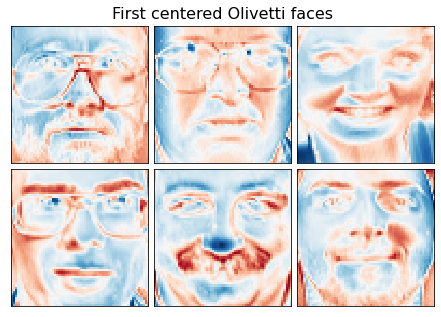

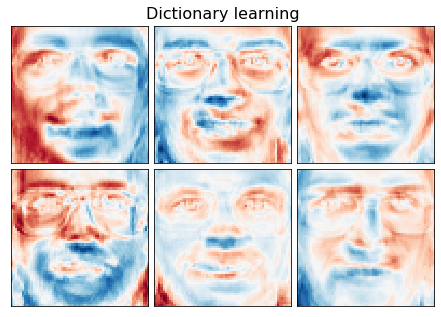

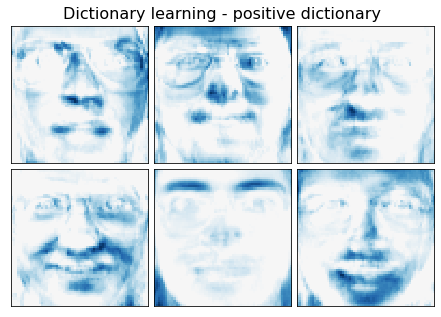

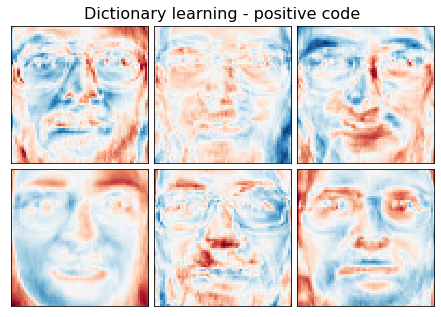

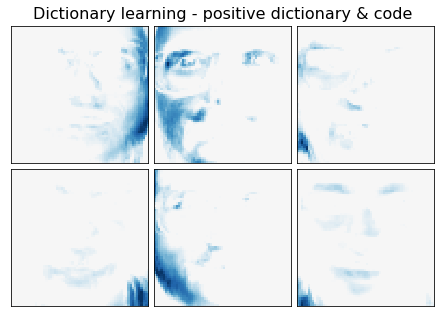

In [17]:
import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True,
                                random_state=rng)
n_samples, n_features = faces.shape

faces_centered = faces - faces.mean(axis=0)

faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

estimators = [
    ('Eigenfaces - PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, svd_solver='randomized',
                       whiten=True),
     True),

    ('Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3),
     False),

    ('Independent components - FastICA',
     decomposition.FastICA(n_components=n_components, whiten=True),
     True),

    ('Sparse comp. - MiniBatchSparsePCA',
     decomposition.MiniBatchSparsePCA(n_components=n_components, alpha=0.8,
                                      n_iter=100, batch_size=3,
                                      random_state=rng),
     True),

    ('MiniBatchDictionaryLearning',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  random_state=rng),
     True),

    ('Cluster centers - MiniBatchKMeans',
        MiniBatchKMeans(n_clusters=n_components, tol=1e-3, batch_size=20,
                        max_iter=50, random_state=rng),
     True),

    ('Factor Analysis components - FA',
     decomposition.FactorAnalysis(n_components=n_components, max_iter=20),
     True),
]

plot_gallery("First centered Olivetti faces", faces_centered[:n_components])


for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_

    if (hasattr(estimator, 'noise_variance_') and
            estimator.noise_variance_.ndim > 0): 
        plot_gallery("Pixelwise variance",
                     estimator.noise_variance_.reshape(1, -1), n_col=1,
                     n_row=1)
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])

plt.show()


estimators = [
    ('Dictionary learning',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  random_state=rng),
     True),
    ('Dictionary learning - positive dictionary',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  random_state=rng,
                                                  positive_dict=True),
     True),
    ('Dictionary learning - positive code',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  fit_algorithm='cd',
                                                  random_state=rng,
                                                  positive_code=True),
     True),
    ('Dictionary learning - positive dictionary & code',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  fit_algorithm='cd',
                                                  random_state=rng,
                                                  positive_dict=True,
                                                  positive_code=True),
     True),
]


plot_gallery("First centered Olivetti faces", faces_centered[:n_components],
             cmap=plt.cm.RdBu)

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    components_ = estimator.components_
    plot_gallery(name, components_[:n_components], cmap=plt.cm.RdBu)

plt.show()
